In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

import scipy as sp
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [4]:
np.random.seed(42)

# Testing logistic regression for different discretized z resolutions

In [17]:
C = 1e-2
iterations = 1000

z_discs = np.arange(10, 110, 10)

f1s = []

for z_disc in z_discs:
    filename_p = "pDisc_40000_"+"20x20x" + str(z_disc) + ".npz"
    filename_C = "CDisc_40000_"+"20x20x" + str(z_disc) + ".npz"
    p_data = sp.sparse.load_npz('/home/taylor/Documents/independent-research/data/20x20xVaryingZ/'+filename_p)
    C_data = sp.sparse.load_npz('/home/taylor/Documents/independent-research/data/20x20xVaryingZ/'+filename_C)
    full_data = sp.sparse.vstack([p_data, C_data], format='csr')
    
    p_labels = np.zeros((p_data.shape[0],))
    C_labels = np.ones((C_data.shape[0],))
    full_labels = np.hstack((p_labels, C_labels))
    
    X_train, X_test, y_train, y_test = train_test_split(full_data, full_labels, test_size=0.25, random_state=42)

    
    y_pred = LogisticRegression(C=C, max_iter=iterations).fit(X_train, y_train).predict(X_test)
    
    f1s.append(metrics.f1_score(y_test, y_pred))
    print("Complete for z_disc: " + str(z_disc) + " with f1 score of: " + str(metrics.f1_score(y_test, y_pred)))

Complete for z_disc: 10 with f1 score of: 0.913757388976
Complete for z_disc: 20 with f1 score of: 0.917459032976
Complete for z_disc: 30 with f1 score of: 0.912067305256
Complete for z_disc: 40 with f1 score of: 0.914164391871
Complete for z_disc: 50 with f1 score of: 0.914963744232
Complete for z_disc: 60 with f1 score of: 0.913131517667
Complete for z_disc: 70 with f1 score of: 0.91100060889
Complete for z_disc: 80 with f1 score of: 0.914265422078
Complete for z_disc: 90 with f1 score of: 0.91296625222
Complete for z_disc: 100 with f1 score of: 0.913242940157


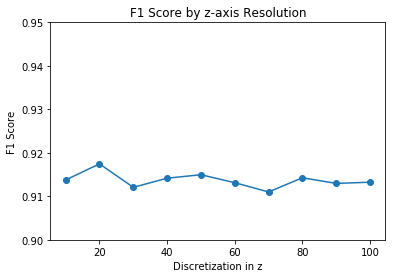

In [29]:
plt.plot(z_discs, f1s, '-o')
        
plt.xlabel('Discretization in z')
plt.ylabel('F1 Score')
plt.title('F1 Score by z-axis Resolution')

plt.ylim(0.9, 0.95)

#plt.savefig('/home/taylor/Documents/independent-research/plots/results/LogisticRegression_F1xZresolution.pdf')